<a href="https://colab.research.google.com/github/chrislee973/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [111]:
#Import all libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
#Save LendingClub zip file in cloud instance 

!wget  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-09-01 20:05:35--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 35.161.89.82, 54.148.13.215, 54.244.115.45
Connecting to resources.lendingclub.com (resources.lendingclub.com)|35.161.89.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [               <=>  ]  22.28M  6.09MB/s    in 3.8s    

2020-09-01 20:05:40 (5.81 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23360898]



In [5]:
#Unzip file 

!unzip LoanStats_2018Q4.csv.zip 

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [7]:
#Read in data 

df = pd.read_csv('LoanStats_2018Q4.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [8]:
#Examine head 

df.head()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title       emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose     title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       27975     27975       27975            36 months  14.47%  962.52      C     C2        Conductor       10+ years  MORTGAGE       180000     Not Verified        Dec-2018 Fully Paid  n          NaN NaN  credit_card Credit card refinancing 117xx    NY         11.47 0           Jul-1995         0              39                     NaN                    10       0       29711     66.8%      19        w                   0.00      0.00          31804.5298492634 31804.53        27975.00        3829.53       0.0                0.0        0.0                     Jan-2020     20288.02        NaN          Mar-2020           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            206072      0           1           0           1           17                 15676        63      0           1           10861      65       44500            1      4           2            2                    20607       7416           74.9    0                        0           17                 281                  20                    17             5        20                   39                       1                     39                             0                     5              7               5           6         1         8             13            7                   10       0                0            0                  0                  78.9           60               0             

In [10]:
#Examine tail

df.tail()


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 5000  5000  5000   36 months  13.56% 169.83 C   C1  Payoff Clerk         10+ years MORTGAGE 35360.0 Not Verified    Oct-2018 Current n   NaN NaN debt_consolidation Debt consolidation      381xx TN  11.3  1   Jun-2006 0   21.0 NaN 9   0   2597 27.3% 15  f   2187.38 2187.38 3732.49 3732.49 2812.62 919.87  0.0 0.0 0.0 Aug-2020 169.83 Sep-2020 Aug-2020 0   NaN  1   Individual NaN NaN NaN 0   1413 69785 0   2   0   1   16.0 2379    40.0  3   4   1826 32.0 9500  0   0   1   5   8723   1174.0  60.9 0   0   147.0 85  9   9   2   10.0  21.0 9.0 21.0 0   1   3   2   2   6   6   7   3   9   0.0 0   0   3   92.9 50.0 0   0   93908   4976  3000  6028.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     10000 10000 9750   36 months  11.06% 327.68 B   B3  NaN                  NaN       RENT     44400.0 Source Verified Oct-2018 Current n   NaN NaN credit_card        Credit card refinancing 980xx WA  11.78 0   Oct-2008 2   40.0 NaN 15  0   6269 13.1% 25  f   4285.08 4177.96 7193.6  7013.76 5714.92 1478.68 0.0 0.0 0.0 Aug-2020 327.68 Sep-2020 Aug-2020 0   53.0 1   Individual NaN NaN NaN 0   520  16440 3   1   1   1   2.0  10171   100.0 2   5   404  28.0 47700 0   3   5   6   1265.0 20037.0 2.3  0   0   61.0  119 1   1   0   1.0   NaN  1.0 40.0 1   2   4   6   8   3   14  22  4   15  0.0 0   0   3   92.0 0.0  0   0   57871.0 16440 20500 10171.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                                 10000  36 months  16.91% 356.08 C   C5  Key Accounts Manager 2 years   RENT     80000.0 Not Verified    Oct-2018 Current n   NaN NaN other              Other                   021xx MA  17.72 1   Sep-2006 0   14.0 NaN 17  0   1942 30.8% 31  w   4495.59 4495.59 7824.37 7824.37 5504.41 2319.96 0.0 0.0 0.0 Aug-2020 356.08 Sep-2020 Aug-2020 0   25.0 1   Individual NaN NaN NaN 0   0    59194 0   15  1   1   12.0 57252.0 85.0  0   0   1942 80.0 6300  0   5   0   1   3482   2058.0  48.5 0   0   144.0 142 40  12  0   131.0 30.0 NaN 30.0 3   1   1   1   5   22  2   9   1   17  0.0 0   0   1   74.2 0.0  0   0   73669   59194 4000  67369   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 2050909275 NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN NaN NaN  NaN   NaN NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN NaN NaN NaN      NaN    NaN      NaN      NaN NaN  NaN NaN        NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN  NaN     NaN   NaN NaN NaN  NaN  NaN   NaN NaN NaN NaN NaN    NaN     NaN  NaN NaN NaN   NaN NaN NaN NaN NaN   NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN     NaN   NaN   NaN     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 820109297  NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN N

In [16]:
#Fix incorrect header and footer

df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
#Examine new head and tail 
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,27975,27975,27975.0,36 months,14.47%,962.52,C,C2,Conductor,10+ years,MORTGAGE,180000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,11.47,0,Jul-1995,0,39.0,NaN,10,0,29711,66.8%,19,w,0.00,0.00,31804.529849,31804.53,...,60.0,0,0,286525,45387,29500,25025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000,10000,10000.0,60 months,12.98%,227.43,B,B5,Printer,9 years,RENT,60000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,660xx,KS,14.90,0,May-2007,0,NaN,112.0,7,1,10677,54.2%,12,w,7352.95,7352.95,4487.310000,4487.31,...,33.3,1,0,36200,27595,13000,16500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,28000,28000,28000.0,60 months,13.56%,645.15,C,C1,Project Manager,10+ years,MORTGAGE,128500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,760xx,TX,27.35,1,Jul-1987,0,24.0,NaN,16,0,55206,75%,31,w,20667.91,20667.91,12871.360000,12871.36,...,100.0,0,0,542027,128345,55000,60331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,16000,16000,16000.0,60 months,13.56%,368.66,C,C1,LMSW,10+ years,RENT,46000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,787xx,TX,11.09,1,Oct-1997,1,11.0,NaN,9,0,18946,32.1%,21,w,11503.84,11503.84,7570.880000,7570.88,...,20.0,0,0,138125,128218,57600,79125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,7500,7500,7500.0,36 months,10.72%,244.55,B,B2,Program Manager,2 years,RENT,84000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,600xx,IL,3.86,0,May-2005,1,NaN,114.0,9,1,2200,12.6%,17,w,0.00,0.00,2829.930000,2829.93,...,0.0,1,0,403892,20833,17400,16812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,4427.45,4427.45,7620.38,7620.38,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2187.38,2187.38,3732.49,3732.49,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,4285.08,4177.96,7193.60,7013.76,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,4495.59,4495.59,7824.37,7824.37,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Examine columns with null values

df.isnull().sum().sort_values(ascending=False)

id                          128412
member_id                   128412
url                         128412
desc                        128412
settlement_percentage       127475
                             ...  
acc_open_past_24mths             0
chargeoff_within_12_mths         0
delinq_amnt                      0
mo_sin_old_rev_tl_op             0
inq_fi                           0
Length: 144, dtype: int64

In [21]:
#Drop id, member_id, url, desc columns

df = df.drop(['id', 'member_id', 'url'], axis=1)

In [28]:
#Clean up int_rate column 

def clean_intrate(rate): 
  '''
  Removes white space and percent sign, and then converts it to float
  '''
  return float(rate.strip(' %'))

df['int_rate'] = df['int_rate'].apply(clean_intrate)

#Check to see if int_rate is now float
df['int_rate']

0         14.47
1         12.98
2         13.56
3         13.56
4         10.72
          ...  
128407    15.02
128408    15.02
128409    13.56
128410    11.06
128411    16.91
Name: int_rate, Length: 128412, dtype: float64

In [33]:
#Clean up emp_title

df['emp_title'].value_counts(dropna=False)

def clean_emptitle(emp): 
  if isinstance(emp, str): 
    return emp.strip().title()
  else: 
    return "unknkown"

df['emp_title_cleaned']= df['emp_title'].apply(clean_emptitle)

#Check new emp_title_cleaned
df['emp_title_cleaned']


0                    Conductor
1                      Printer
2              Project Manager
3                         Lmsw
4              Program Manager
                  ...         
128407          Tax Consultant
128408          Security Guard
128409            Payoff Clerk
128410                unknkown
128411    Key Accounts Manager
Name: emp_title_cleaned, Length: 128412, dtype: object

In [34]:
#How many unique employment titles? 

df['emp_title_cleaned'].nunique()

34902

In [41]:
#Convert dates to datetime format 

df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

df['issue_d']

0        2018-12-01
1        2018-12-01
2        2018-12-01
3        2018-12-01
4        2018-12-01
            ...    
128407   2018-10-01
128408   2018-10-01
128409   2018-10-01
128410   2018-10-01
128411   2018-10-01
Name: issue_d, Length: 128412, dtype: datetime64[ns]

In [42]:
#Create year and month columns 

df['issue_d_year'] = df['issue_d'].dt.year
df['issue_d_month']=df['issue_d'].dt.month

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_cleaned,issue_d_year,issue_d_month
0,27975,27975,27975.0,36 months,14.47,962.52,C,C2,Conductor,10+ years,MORTGAGE,180000.0,Not Verified,2018-12-01,Fully Paid,n,NaN,credit_card,Credit card refinancing,117xx,NY,11.47,0,Jul-1995,0,39.0,NaN,10,0,29711,66.8%,19,w,0.00,0.00,31804.529849,31804.53,27975.00,3829.53,0.0,...,286525,45387,29500,25025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,Conductor,2018,12
1,10000,10000,10000.0,60 months,12.98,227.43,B,B5,Printer,9 years,RENT,60000.0,Not Verified,2018-12-01,Current,n,NaN,credit_card,Credit card refinancing,660xx,KS,14.90,0,May-2007,0,NaN,112.0,7,1,10677,54.2%,12,w,7352.95,7352.95,4487.310000,4487.31,2647.05,1840.26,0.0,...,36200,27595,13000,16500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,Printer,2018,12
2,28000,28000,28000.0,60 months,13.56,645.15,C,C1,Project Manager,10+ years,MORTGAGE,128500.0,Source Verified,2018-12-01,Current,n,NaN,credit_card,Credit card refinancing,760xx,TX,27.35,1,Jul-1987,0,24.0,NaN,16,0,55206,75%,31,w,20667.91,20667.91,12871.360000,12871.36,7332.09,5539.27,0.0,...,542027,128345,55000,60331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,Project Manager,2018,12
3,16000,16000,16000.0,60 months,13.56,368.66,C,C1,LMSW,10+ years,RENT,46000.0,Not Verified,2018-12-01,Current,n,NaN,credit_card,Credit card refinancing,787xx,TX,11.09,1,Oct-1997,1,11.0,NaN,9,0,18946,32.1%,21,w,11503.84,11503.84,7570.880000,7570.88,4496.16,3074.72,0.0,...,138125,128218,57600,79125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,Lmsw,2018,12
4,7500,7500,7500.0,36 months,10.72,244.55,B,B2,Program Manager,2 years,RENT,84000.0,Not Verified,2018-12-01,Charged Off,n,NaN,debt_consolidation,Debt consolidation,600xx,IL,3.86,0,May-2005,1,NaN,114.0,9,1,2200,12.6%,17,w,0.00,0.00,2829.930000,2829.93,1465.61,484.09,0.0,...,403892,20833,17400,16812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,Program Manager,2018,12


In [43]:
#Convert earliest_cr_line into datetime

df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], infer_datetime_format=True)

In [44]:
df['issue_d']-df['earliest_cr_line']

0         8554 days
1         4232 days
2        11476 days
3         7731 days
4         4962 days
            ...    
128407   12114 days
128408   13241 days
128409    4505 days
128410    3652 days
128411    4413 days
Length: 128412, dtype: timedelta64[ns]

In [49]:
#Find number of years between issue_d and earliest_cr_line to find credit history length

df['credit_history_length'] = (df['issue_d']-df['earliest_cr_line']).dt.days / 365

df['credit_history_length'].sort_values(ascending=False)

16238    68.961644
60863    68.879452
17750    68.465753
24953    64.958904
12813    64.958904
           ...    
16123     3.084932
19892     3.084932
35605     3.084932
94656     3.084932
84697     3.084932
Name: credit_history_length, Length: 128412, dtype: float64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

In [72]:
#Modify emp_title_cleaned to replace titles with 'Other' if the title is not in the top 20

#Get top twenty titles as a list (not including 'unknown' as an occupation) 

top20 = df['emp_title_cleaned'].value_counts().head(20).index
top20

#Modify emp_title_cleaned to 'Other' if title not in top 20

df['emp_title_cleaned'] = df['emp_title_cleaned'].apply(lambda x: x if x in top20 else 'Other')

In [73]:
df['emp_title_cleaned'].value_counts()

Other                 89941
unknkown              20947
Teacher                2557
Manager                2395
Registered Nurse       1418
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          805
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   425
Technician              420
Engineer                412
Name: emp_title_cleaned, dtype: int64

You can uncomment and run the cells below to re-download and extract the Instacart data

In [74]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-09-01 22:09:46--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.97.45
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.97.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  59.8MB/s    in 3.3s    

2020-09-01 22:09:50 (59.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [75]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [76]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [82]:
#Read in the datasets
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [145]:
orders.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [86]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [89]:
order_products_prior.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [103]:
order_products_train.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


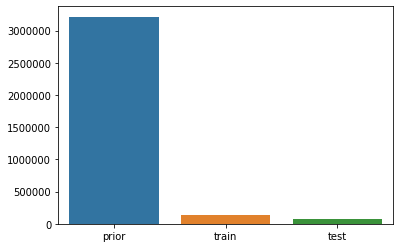

In [116]:
#Get and graph the count of rows in orders, order_products_train, and order_products_prior

num_rows = orders['eval_set'].value_counts()
sns.barplot(x=num_rows.index, y = num_rows.values)
plt.ticklabel_format(style='plain', axis='y')


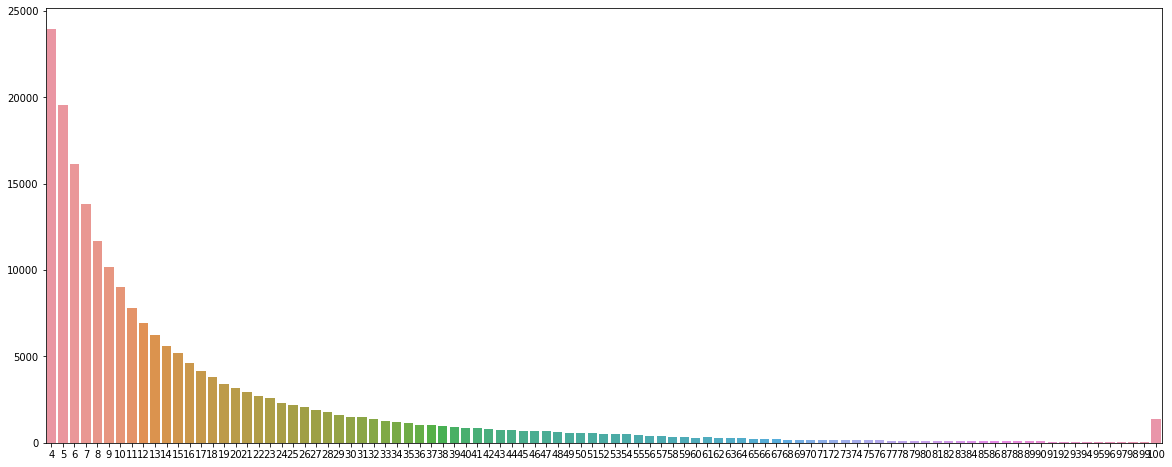

In [137]:
#Verify that between 4 and 100 orders were collected for each user in dataset 

plt.figure(figsize=(20,8))
order_count = orders.groupby('user_id')['order_number'].max().value_counts()
sns.barplot(x=order_count.index, y=order_count.values)

In [138]:
order_count

4     23986
5     19590
6     16165
7     13850
8     11700
      ...  
94       57
91       56
97       54
98       50
99       47
Name: order_number, Length: 97, dtype: int64

In [147]:
orders.groupby('user_id')['order_number'].max()

user_id
1         11
2         15
3         13
4          6
5          5
          ..
206205     4
206206    68
206207    17
206208    50
206209    14
Name: order_number, Length: 206209, dtype: int64